In [1]:
import numpy as np
import pandas as pd
from collections import Counter 
import matplotlib.pyplot as plt
import math

In [2]:
data_business = pd.read_csv('/Users/noraxu/MSiA-Google/MSiABlog/business.csv',index_col=0)

In [3]:
category_frequency = []
num_tags = []

for i in range(data_business.shape[0]):
    each_line = data_business['category'][i].split(", ")
    for content in each_line:
        category_frequency.append(content)
        num_tags.append(len(content))

In [4]:
sum(num_tags) / len(num_tags)

9.741937137876224

In [5]:
data_business.business_id.describe()

count                      10093
unique                     10093
top       ICFYlS9nwsoAyaiRXMu9tQ
freq                           1
Name: business_id, dtype: object

In [6]:
new_feature = Counter(category_frequency).most_common(63)

feature = pd.DataFrame()
for ind,val in enumerate(new_feature[2:]):
    feature.loc[ind,'Feature'] = val[0]
    feature.loc[ind,'IDF'] =  math.log1p(len(data_business.business_id) / val[1])

In [7]:
data_business2 = data_business

In [8]:
for tag in range(feature.shape[0]):
    ft = feature.loc[tag,'Feature']
    for i in range(data_business2.shape[0]):
        each_line = data_business2['category'][i].split(", ")
        if ft in each_line:
            data_business2.loc[i,ft] = 1 
        else:
            data_business2.loc[i,ft] = 0

In [9]:
data_business2.describe()
data_business2.to_csv('/Users/noraxu/MSiA-Google/MSiABlog/business_Nora2.csv')

In [10]:
data_business2.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Halal,Gluten-Free,Food Delivery Services,Wine Bars,Delis,Health Markets,Tea Rooms,Sports Bars,Gastropubs,Tapas/Small Plates
0,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",Toronto,ON,M3B 1Y6,43.754093,-79.349548,4.5,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
new_feature = Counter(category_frequency).most_common(1000)
newdt = pd.DataFrame(new_feature)
newdt.describe()


,1
count,436.000000
mean,89.463303
std,454.371883
min,1.000000
25%,2.000000
50%,7.000000
75%,37.250000
max,7964.000000


In [12]:
new_feature

[('Restaurants', 7964),
 ('Food', 4182),
 ('Coffee & Tea', 1368),
 ('Nightlife', 1162),
 ('Bars', 1111),
 ('Specialty Food', 801),
 ('Sandwiches', 705),
 ('Breakfast & Brunch', 700),
 ('Canadian (New)', 694),
 ('Cafes', 680),
 ('Chinese', 652),
 ('Italian', 631),
 ('Bakeries', 587),
 ('Pizza', 571),
 ('Japanese', 546),
 ('Desserts', 545),
 ('Fast Food', 539),
 ('Burgers', 463),
 ('American (Traditional)', 396),
 ('Sushi Bars', 383),
 ('Event Planning & Services', 372),
 ('Grocery', 359),
 ('Indian', 336),
 ('Middle Eastern', 329),
 ('Mediterranean', 312),
 ('Asian Fusion', 311),
 ('Ice Cream & Frozen Yogurt', 295),
 ('Thai', 294),
 ('Mexican', 280),
 ('Pubs', 276),
 ('Shopping', 273),
 ('American (New)', 270),
 ('Korean', 269),
 ('Caterers', 262),
 ('Juice Bars & Smoothies', 260),
 ('Seafood', 257),
 ('Chicken Wings', 244),
 ('Salad', 223),
 ('Beer', 223),
 ('Wine & Spirits', 223),
 ('Barbeque', 210),
 ('Vietnamese', 200),
 ('Vegetarian', 196),
 ('French', 188),
 ('Ethnic Food', 181),


(array([430.,   4.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 7.9730e+02, 1.5936e+03, 2.3899e+03, 3.1862e+03,
        3.9825e+03, 4.7788e+03, 5.5751e+03, 6.3714e+03, 7.1677e+03,
        7.9640e+03]),
 <a list of 10 Patch objects>)

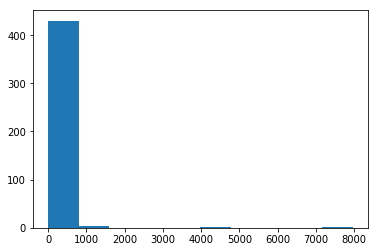

In [13]:
plt.hist(newdt[1])

In [14]:
newdt[:80]

,0,1
0,Restaurants,7964
1,Food,4182
2,Coffee & Tea,1368
3,Nightlife,1162
4,Bars,1111
5,Specialty Food,801
6,Sandwiches,705
7,Breakfast & Brunch,700
8,Canadian (New),694
9,Cafes,680


In [15]:
feature.head(5)

,Feature,IDF
0,Coffee & Tea,2.125600
1,Nightlife,2.270670
2,Bars,2.311010
3,Specialty Food,2.610107
4,Sandwiches,2.728918


In [16]:
for tag in range(feature.shape[0]):
    ft = feature.loc[tag,'Feature']
    idf = feature.loc[tag,'IDF']
    for i in range(data_business.shape[0]):
        each_line = data_business['category'][i].split(", ")
        if ft in each_line:
            data_business.loc[i,ft] = 1 / len(each_line) * idf
        else:
            data_business.loc[i,ft] = 0

In [17]:
data_business.to_csv('/Users/noraxu/MSiA-Google/MSiABlog/business_Nora.csv')

In [18]:
data_business.describe()

,latitude,longitude,stars,review_count,Coffee & Tea,Nightlife,Bars,Specialty Food,Sandwiches,Breakfast & Brunch,...,Halal,Gluten-Free,Food Delivery Services,Wine Bars,Delis,Health Markets,Tea Rooms,Sports Bars,Gastropubs,Tapas/Small Plates
count,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,...,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000
mean,43.681057,-79.392436,3.464629,40.679976,0.085730,0.042937,0.041434,0.044661,0.046176,0.042146,...,0.014134,0.011574,0.012990,0.008203,0.012787,0.010787,0.013781,0.008029,0.011599,0.008941
std,0.046194,0.061268,0.761838,76.631472,0.243476,0.125094,0.123169,0.163826,0.184199,0.172326,...,0.121245,0.101253,0.120315,0.074128,0.121964,0.101473,0.129941,0.074040,0.121292,0.096226
min,43.592327,-79.703390,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.650806,-79.418194,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.664176,-79.393529,3.500000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.696332,-79.371987,4.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.876501,-79.137178,5.000000,2121.000000,1.062800,1.135335,0.770337,1.305053,1.364459,1.367786,...,2.111857,1.423607,2.149401,0.872972,2.190085,1.462638,2.197861,1.102882,2.205763,2.297511


In [19]:
data_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Halal,Gluten-Free,Food Delivery Services,Wine Bars,Delis,Health Markets,Tea Rooms,Sports Bars,Gastropubs,Tapas/Small Plates
0,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",Toronto,ON,M3B 1Y6,43.754093,-79.349548,4.5,8,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,...,0.0,0.0,0.0,0.727477,0.0,0.0,0.0,0.0,0.0,0.0
4,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
